# 파일 불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df

Unnamed: 0  Gender  Shift  Injury Location  Age_grouping  \
0             0       1      1                0             1   
1             1       0      0                0             1   
2             2       1      0                0             2   
3             3       0      0                1             4   
4             4       1      0                0             1   
..          ...     ...    ...              ...           ...   
467         509       0      1                0             2   
468         510       1      1                0             2   
469         511       1      1                0             1   
470         512       1      1                4             2   
471         513       1      1                4             4   

     scaled_DaysLost  scaled_IncidentCost  Incident Type_Burn  \
0                0.0               1.0000                   1   
1                0.0               0.9988                   0   
2                1.0               0.9938                   0   
3                0.5               0.9894                   0   
4                0.6               0.9880                   0   
..               ...                  ...                 ...   
467              0.0               0.0000                   0   
468              0.0               0.0000                   0   
469              0.0               0.0000                   0   
470              0.0               0.0000                   0   
471              0.0               0.0000                   0   

     Incident Type_Crush & Pinch  Incident Type_Cut  Incident Type_Equipment  \
0                              0                  0                        0   
1                              0                  1                        0   
2                              0                  0                        0   
3                              0                  0                        0   
4                              0                  0                        0   
..                           ...                ...                      ...   
467                            0                  0                        0   
468                            0                  0                        0   
469                            1                  0                        0   
470                            0                  0                        0   
471                            0                  1                        0   

     Incident Type_Fall  Incident Type_Falling object  Incident Type_Lifting  \
0                     0                             0                      0   
1                     0                             0                      0   
2                     0                             0                      1   
3                     0                             0                      1   
4                     0                             0                      1   
..                  ...                           ...                    ...   
467                   0                             0                      1   
468                   0                             0                      0   
469                   0                             0                      0   
470                   0                             0                      1   
471                   0                             0                      0   

     Incident Type_Slip/trip  Incident Type_Vehicle  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          0                      0  
4                          0                      0  
..                       ...                    ...  
467                        0                      0  
468                        1                      0  
469                        0       

# 전처리

In [2]:
from sklearn.model_selection import train_test_split

X=df[['Shift', 'scaled_DaysLost', 'Gender', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[['Injury Location']].astype(float)
Y=np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =1)
X

Shift  scaled_DaysLost  Gender  Incident Type_Burn  \
0      1.0              0.0     1.0                 1.0   
1      0.0              0.0     0.0                 0.0   
2      0.0              1.0     1.0                 0.0   
3      0.0              0.5     0.0                 0.0   
4      0.0              0.6     1.0                 0.0   
..     ...              ...     ...                 ...   
467    1.0              0.0     0.0                 0.0   
468    1.0              0.0     1.0                 0.0   
469    1.0              0.0     1.0                 0.0   
470    1.0              0.0     1.0                 0.0   
471    1.0              0.0     1.0                 0.0   

     Incident Type_Crush & Pinch  Incident Type_Cut  Incident Type_Equipment  \
0                            0.0                0.0                      0.0   
1                            0.0                1.0                      0.0   
2                            0.0                0.0                      0.0   
3                            0.0                0.0                      0.0   
4                            0.0                0.0                      0.0   
..                           ...                ...                      ...   
467                          0.0                0.0                      0.0   
468                          0.0                0.0                      0.0   
469                          1.0                0.0                      0.0   
470                          0.0                0.0                      0.0   
471                          0.0                1.0                      0.0   

     Incident Type_Fall  Incident Type_Falling object  Incident Type_Lifting  \
0                   0.0                           0.0                    0.0   
1                   0.0                           0.0                    0.0   
2                   0.0                           0.0                    1.0   
3                   0.0                           0.0                    1.0   
4                   0.0                           0.0                    1.0   
..                  ...                           ...                    ...   
467                 0.0                           0.0                    1.0   
468                 0.0                           0.0                    0.0   
469                 0.0                           0.0                    0.0   
470                 0.0                           0.0                    1.0   
471                 0.0                           0.0                    0.0   

     Incident Type_Slip/trip  Incident Type_Vehicle  
0                        0.0                    0.0  
1                        0.0                    0.0  
2                        0.0                    0.0  
3                        0.0                    0.0  
4                        0.0                    0.0  
..                       ...                    ...  
467                      0.0                    0.0  
468                      1.0                    0.0  
469                      0.0                    0.0  
470                      0.0                    0.0  
471                      0.0                    0.0  

[472 rows x 12 columns]

# 모델링

In [3]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [5]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
pred1 = forest.predict(X_train)
pred2 = forest.predict(X_test)

print('Train Accuracy: ',accuracy_score(y_train,pred1))
print('test Accuracy: ',accuracy_score(y_test,pred2))

Train Accuracy:  0.47745358090185674
test Accuracy:  0.28421052631578947


# 최적의 파라미터 찾기(RandomizedSearch)

In [ ]:
params= {
    'n_estimators':randint(low=100, high=500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':randint(low=1, high=20)
}

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=params, n_iter=20, cv=5, random_state=100)
random_search.fit(X_train, y_train)
print("파라미터 결과 : {}".format(random_search.best_params_))

파라미터 결과 : {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 345}


In [ ]:
Random_modle = RandomForestClassifier(max_depth = 2, max_features='sqrt', n_estimators = 345, random_state=42)
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)

pred1 = Random_modle.predict(X_train)
pred2 = Random_modle.predict(X_test)

print('Train Accuracy: ',accuracy_score(y_train,pred1))
print('test Accuracy: ',accuracy_score(y_test,pred2))

# print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test,pred)))

Train Accuracy:  0.27586206896551724
test Accuracy:  0.29473684210526313


In [ ]:
Random_modle = RandomForestClassifier(max_depth = 5, max_features='sqrt', n_estimators = 345, min_samples_split = 2, min_samples_leaf=11, random_state=42)
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)

pred1 = Random_modle.predict(X_train)
pred2 = Random_modle.predict(X_test)

print('Train Accuracy: ',accuracy_score(y_train,pred1))
print('test Accuracy: ',accuracy_score(y_test,pred2))

# print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test,pred)))

Train Accuracy:  0.29973474801061006
test Accuracy:  0.29473684210526313


In [ ]:
Random_modle = RandomForestClassifier(max_depth = 2, max_features='sqrt', n_estimators = 345)
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)
pred = Random_modle.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test,pred)))

Model accuracy score : 0.3053


In [ ]:
Random_modle = RandomForestClassifier(max_depth = 2, max_features='sqrt', n_estimators = 345,  min_samples_split = 2, min_samples_leaf=5)
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)
pred = Random_modle.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test,pred)))

Model accuracy score : 0.3053


# 시각화

In [5]:
from sklearn.tree import export_graphviz

In [6]:
feature_names = X.columns.tolist()
feature_names = feature_names[0:12]

In [7]:
target_names = np.array(['0','1','2','3','4'])

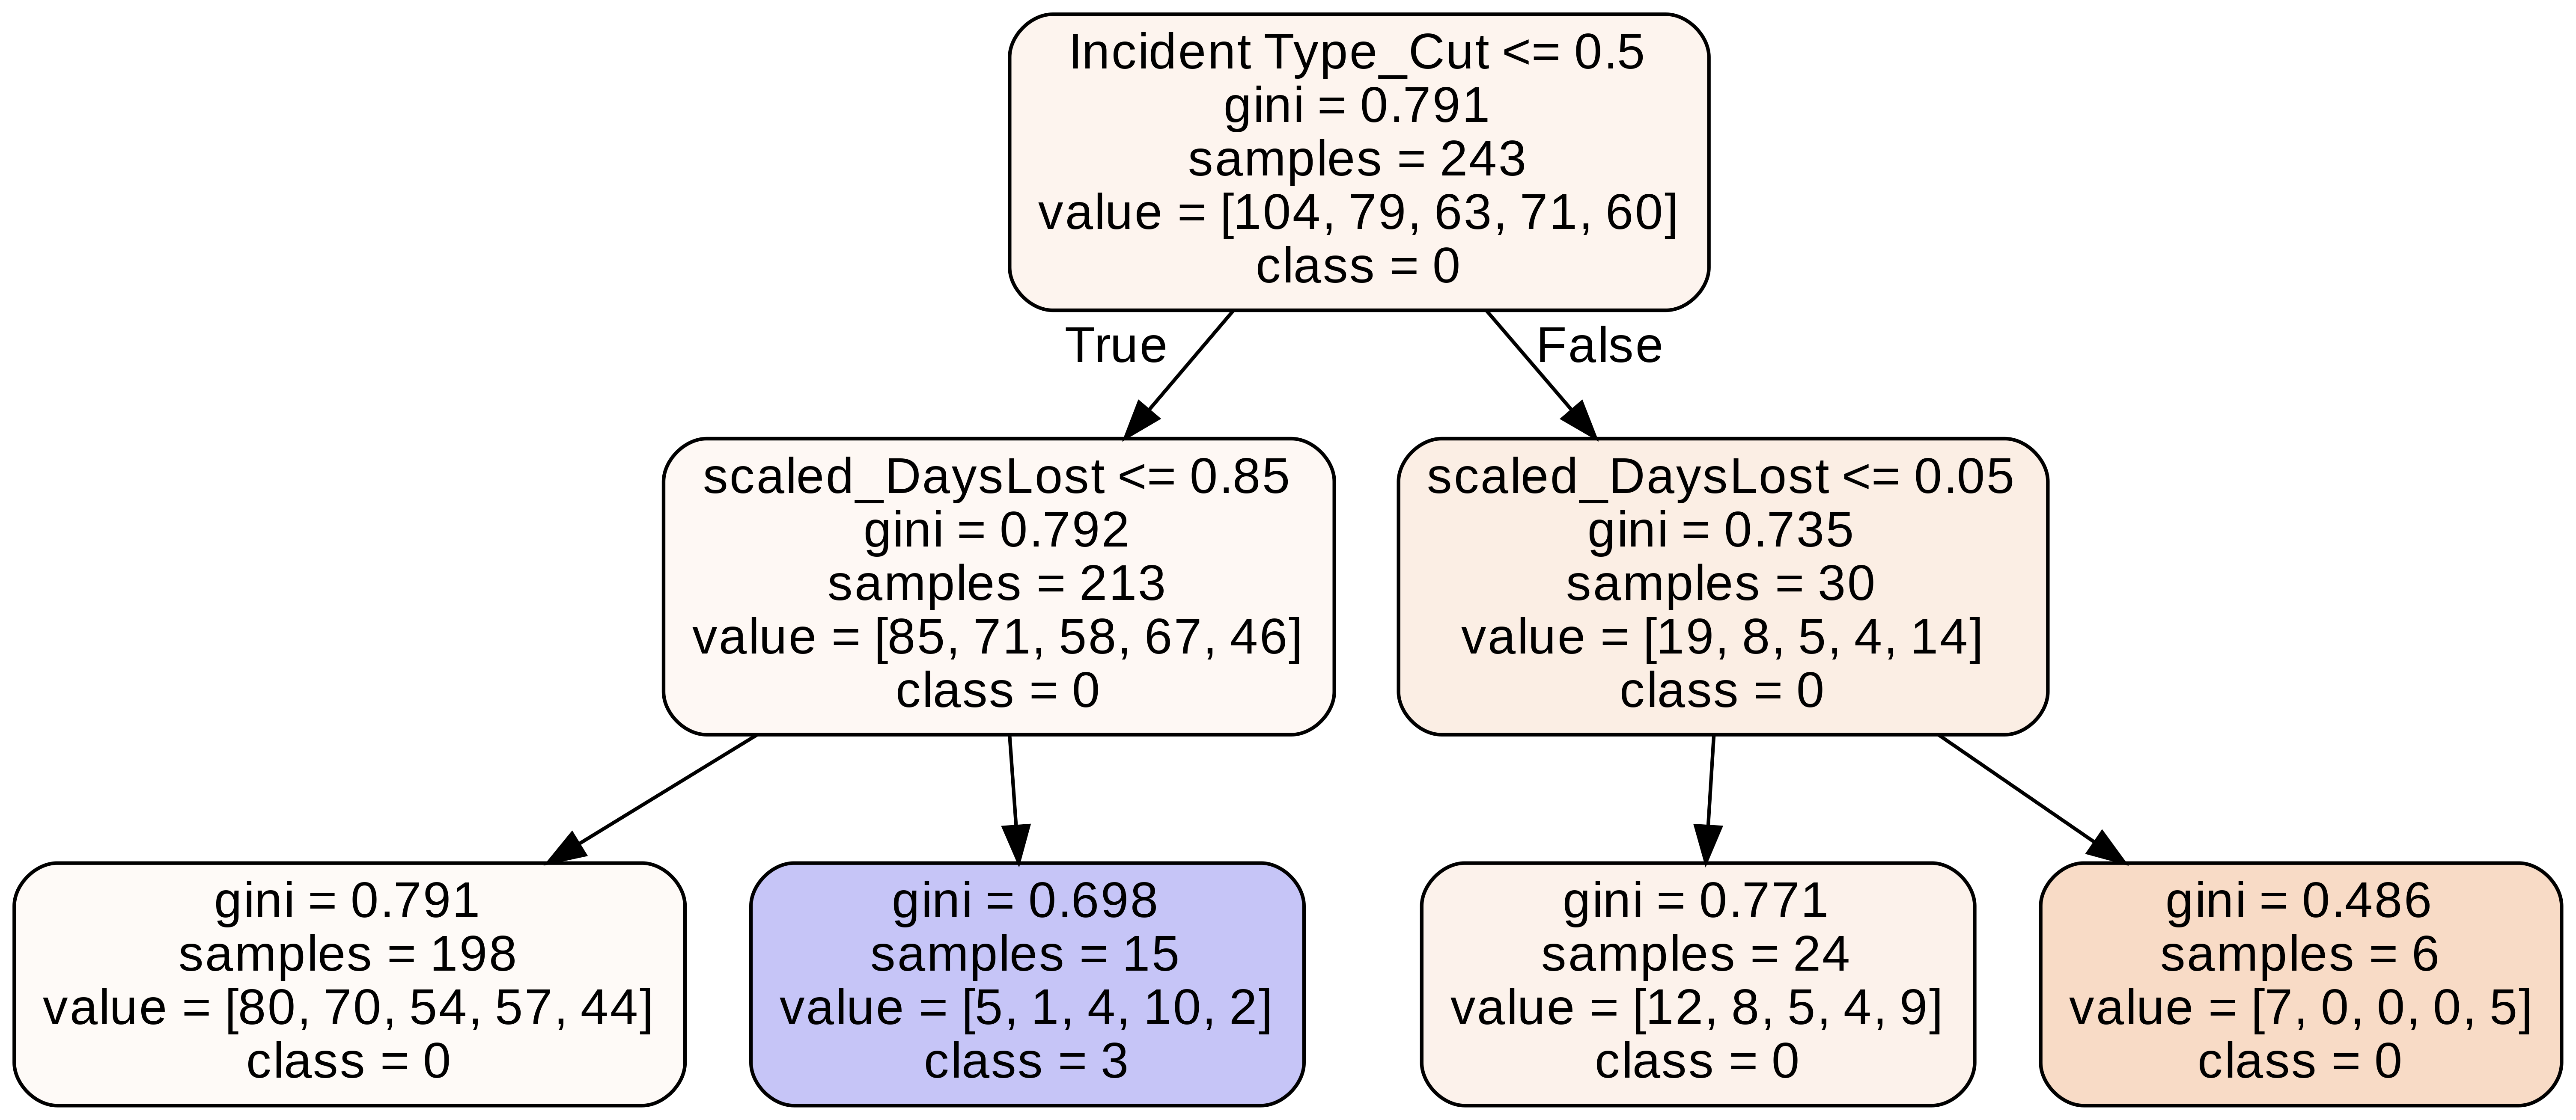

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 345, max_depth=2, random_state=100,max_features='sqrt',  min_samples_split = 2, min_samples_leaf=5)
model.fit(X_train, y_train)


estimator = model.estimators_[3]

export_graphviz(estimator, out_file='tree3.dot', 
                feature_names = feature_names,
                class_names = target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )


from subprocess import call
call(['dot', '-Tpng', 'tree3.dot', '-o', 'randomforest-tree3.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'randomforest-tree3.png')

from IPython.display import Image
Image(filename = 'randomforest-tree3.png')

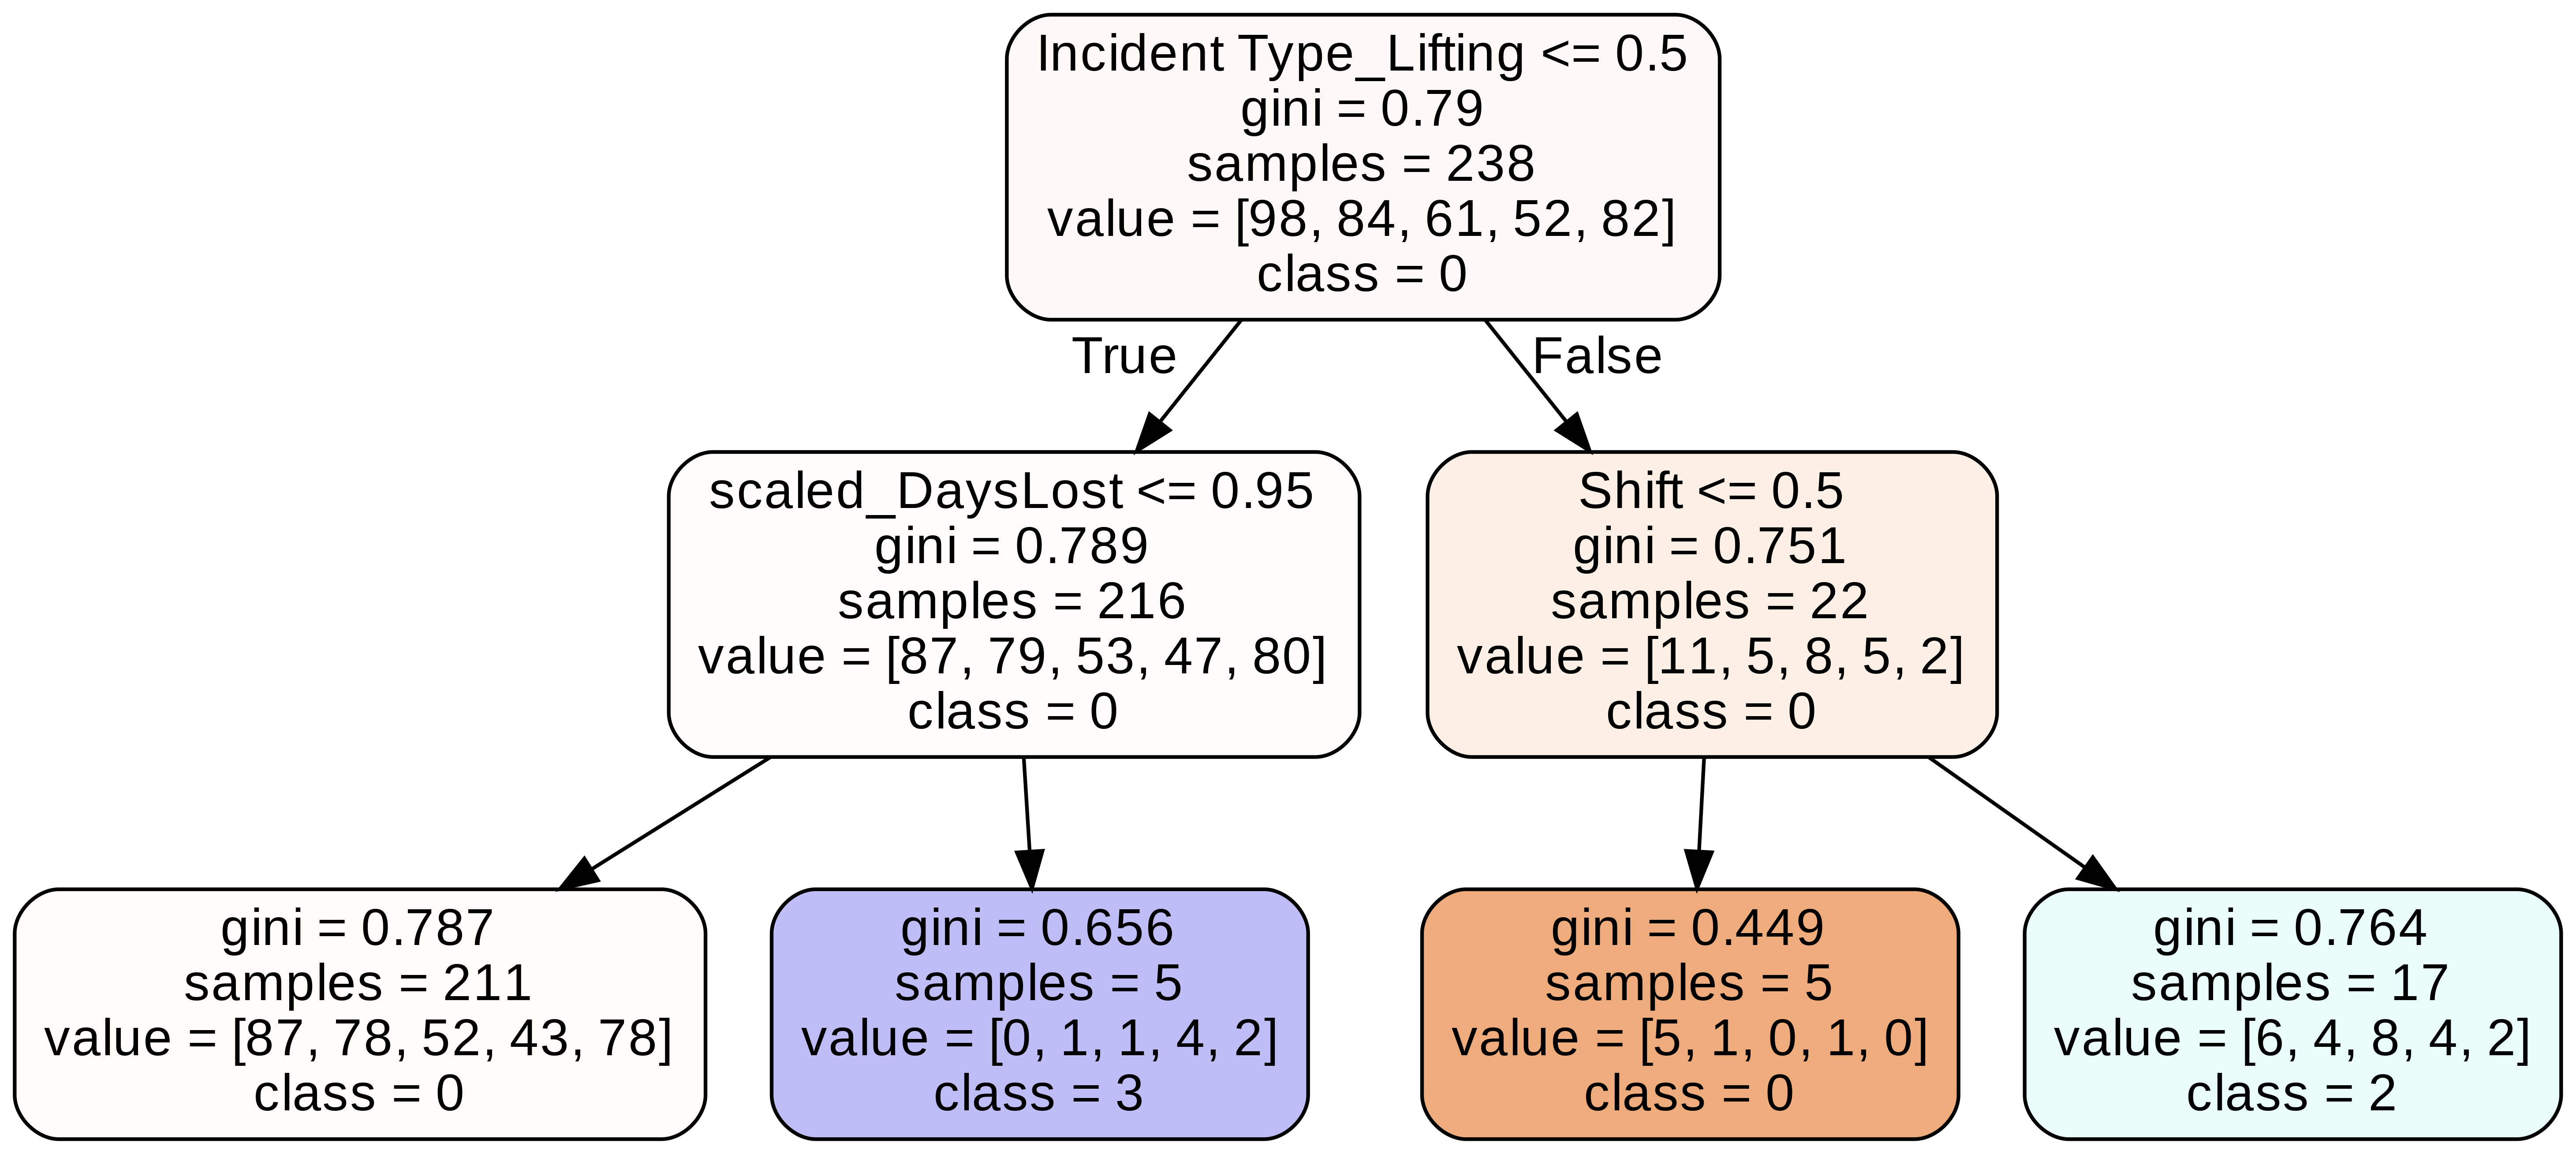

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 345, max_depth=2, random_state=100)
model.fit(X_train, y_train)

estimator = model.estimators_[50]

export_graphviz(estimator, out_file='tree50.dot', 
                feature_names = feature_names,
                class_names = target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )


from subprocess import call
call(['dot', '-Tpng', 'tree50.dot', '-o', 'randomforest-tree50.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'randomforest-tree3.png')

from IPython.display import Image
Image(filename = 'randomforest-tree50.png')

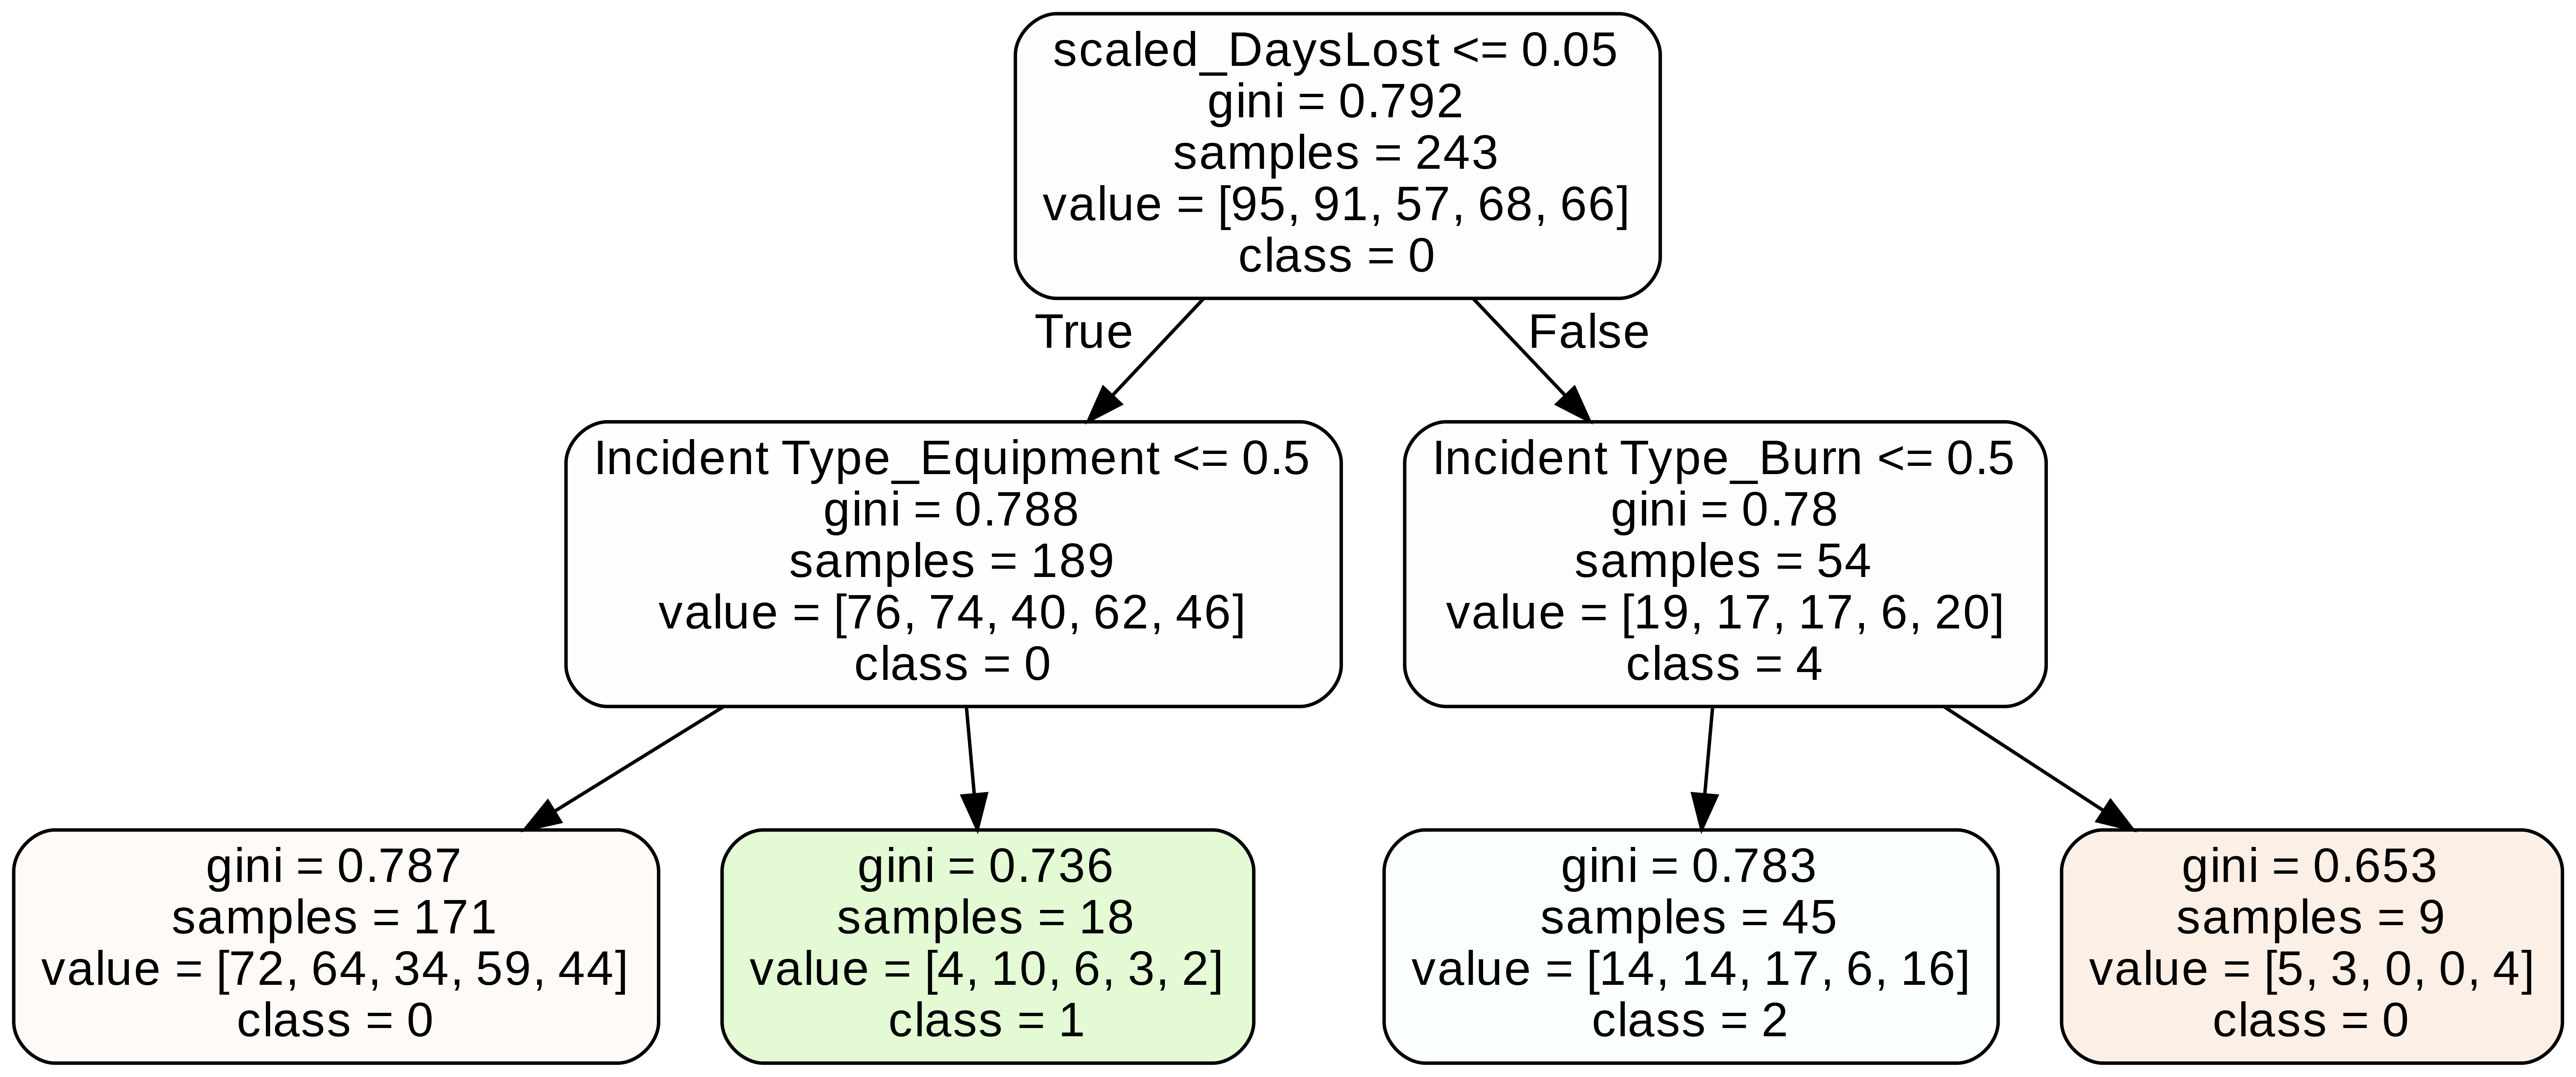

In [8]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 345, max_depth=2, random_state=100)
model.fit(X_train, y_train)

estimator = model.estimators_[99]

export_graphviz(estimator, out_file='tree99.dot', 
                feature_names = feature_names,
                class_names = target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )


from subprocess import call
call(['dot', '-Tpng', 'tree99.dot', '-o', 'randomforest-tree99.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'randomforest-tree3.png')

from IPython.display import Image
Image(filename = 'randomforest-tree99.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


estimator = model.estimators_[99]

export_graphviz(estimator, out_file='tree99.dot', 
                feature_names = feature_names,
                class_names = target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )


from subprocess import call
call(['dot', '-Tpng', 'tree99.dot', '-o', 'randomforest-tree99.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'randomforest-tree3.png')

from IPython.display import Image
Image(filename = 'randomforest-tree99.png')